# **Simulación de acción potencial cardiaca**

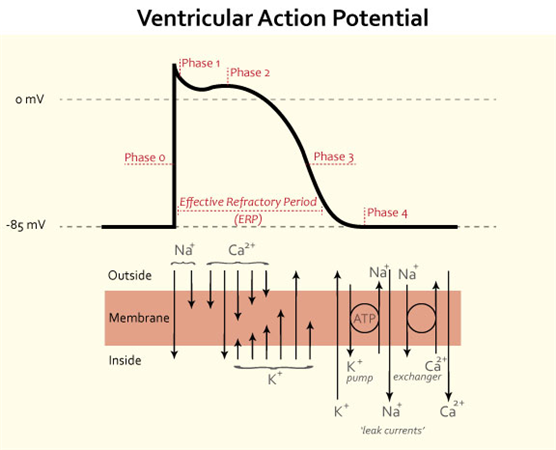

Ref: https://step1.medbullets.com/cardiovascular/108015/myocardial-action-potential

### Instalando las dependencias

In [ ]:
!pip -q install myokit
!apt-get -qq install libsundials-dev > install.log

In [ ]:
import myokit
import matplotlib.pyplot as plt
import numpy as np

### Vamos a cargar el modelo de **Beeler and Reuter 1977**

El modelo fue presentado en  [Beeler, G. W., & Reuter, H. (1977). Reconstruction of the action potential of ventricular myocardial fibres. The Journal of physiology, 268(1), 177-210.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1283659/)

El primer modelo ventricular fue publicado por Beeler y Reuter en 1977. Este modelo utiliza cuatro de las ocho corrientes iónicas diferentes conocidas en ese momento en el músculo cardíaco. Implementaron una corriente interna rápida de Na + INa, pero agregaron una segunda puerta de inactivación más lenta j, la corriente de salida dependiente del tiempo Ix1, una corriente de salida de K + independiente del tiempo IK1 y una entrada lenta de entrada. La corriente es transportada principalmente por Ca2 +. La corriente iónica total en el modelo de Beeler-Reuter está dada por cuatro corrientes y el modelo usa ocho variables.

**Descarguemos el modelo**

In [ ]:
!wget http://myokit.org/static/download/examples/br-1977.mmt

**Permeabilidad de la Membrana**

![Permeabilidad de la membrana](http://models.cellml.org/workspace/beeler_reuter_1977/@@rawfile/cb090c96a2ce627457b14def4910ac39219b8340/beeler_reuter_1977.png)

**Flujo de la Membrana**

Un diagrama esquemático que describe los flujos de corriente a través de la membrana celular que se capturan en el modelo de Beeler-Reuter.

![Flujo de la Membrana](http://models.cellml.org/workspace/beeler_reuter_1977/@@rawfile/cb090c96a2ce627457b14def4910ac39219b8340/cellml_rendering.gif)

**Veamos la especificación del modelo**

In [ ]:
!cat br-1977.mmt

**Carguemos el modelo**

In [ ]:
modelo, protocolo, _ = myokit.load('br-1977.mmt')

**Parámetros a Configurar:**

*   *Segundos:* Rango de tiempo de visualización del Acción Potencial
*   *Comienzo:* Offset del primer potencial de acción
*   *Periodo:* Periodo de recurrencia del potencial acción

INa:
*   *gNaBar:* Coeficiente de conducción de Sodio, que nos da un valor de permeabilidad de ingreso/salida de Sodio
*   *gNaC:* Coeficiente de conducción de Sodio, que nos da un valor de permeabilidad de ingreso/salida de Sodio

Is:
*   *gsBar:* Coeficiente de conducción de Calcio, que nos da un valor de permeabilidad de ingreso de Calcio



**Ejecutemos la simulación**

In [ ]:
#@title **Simulación** { run: "auto" }
segundos = 2.2 #@param {type:"slider", min:0, max:10, step:0.1}

#@markdown  **gNaBar Valor por defecto 4.0 [mS/cm^2]**
gNaBar = 4.0 #@param {type:"slider", min:2, max:5, step:0.001}
#@markdown  **gNaC Valor por defecto 0.003 [mS/cm^2]**
gNaC = 0.0004  #@param {type:"slider", min:0, max:0.005, step:0.0001}
#@markdown  **gsBar Valor por defecto 0.09**
gsBar = 0.059 #@param {type:"slider", min:0.05, max:0.15, step:0.001}
#@markdown  **Inicio del Acción Potencial: Valor por defecto 150.0**
comienzo = 151 #@param {type:"slider", min:101, max:300, step:10}
#@markdown  **Periodo: Valor por defecto 1000.0**
periodo = 1100 #@param {type:"slider", min:100, max:2000, step:100}


modelo.get('ina.gNaBar').set_rhs(gNaBar)
modelo.get('ina.gNaC').set_rhs(gNaC)
modelo.get('isi.gsBar').set_rhs(gsBar)

protocolo.pop()
protocolo.schedule(1.0, comienzo, 2.0, periodo, 0)

minor_ticks = np.arange(0, segundos*1000, 200)
major_ticks = np.arange(-100, 40, 20)

simulacion = myokit.Simulation(modelo, protocolo)

d = simulacion.run(segundos*1000)
plt.figure(figsize=(20,10))
plt.title('Potencial de Membrana')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje de Membrana (mV)")
plt.plot(d['engine.time'], d['membrane.V'])
plt.xticks(minor_ticks)
plt.yticks(major_ticks)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.show()

### **Práctica Dirigida:**

Configurar los parámetros del potencial de acción cardiaca, para mostrar lo siguiente:



1.   Una menor despolarización (Figura y Desarrollo)
2.   Un acortamiento de la repolarización lenta (Figura y Desarrollo)
3.    Una activación del acción potencial mientras todavía se da el proceso de repolarización lenta. (Figura y Desarrollo)
4.    Explicar porqué es peligroso que en el corazón se de una activación del potencial de acción cuando aun esta en proceso de repolarización lenta.


